### Env Setting

In [67]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
from statsmodels.tsa.arima.model import ARIMA

### Loading Taxi dataset

In [68]:
yellow = pd.read_csv("../Data/Taxi_Data/full_yellow.csv", index_col=0)
green = pd.read_csv("../Data/Taxi_Data/full_green.csv", index_col=0)
fhv = pd.read_csv("../Data/Taxi_Data/full_fhv.csv", index_col=0)
hvfhv = pd.read_csv("../Data/Taxi_Data/full_hvfhv.csv", index_col=0)
trad_taxi = yellow.append(green)
app_taxi = fhv.append(hvfhv)
total_taxi = trad_taxi.append(app_taxi)

In [69]:
yellow.index = pd.to_datetime(yellow.index)
green.index = pd.to_datetime(green.index)
fhv.index = pd.to_datetime(fhv.index)
hvfhv.index = pd.to_datetime(hvfhv.index)
trad_taxi.index = pd.to_datetime(trad_taxi.index)
app_taxi.index = pd.to_datetime(app_taxi.index)
total_taxi.index = pd.to_datetime(total_taxi.index)

In [70]:
yellow_monthly = yellow.groupby(pd.Grouper(freq="M")).sum()
green_monthly = green.groupby(pd.Grouper(freq="M")).sum()
fhv_monthly = fhv.groupby(pd.Grouper(freq="M")).sum()
hvfhv_monthly = hvfhv.groupby(pd.Grouper(freq="M")).sum()
trad_taxi_monthly = trad_taxi.groupby(pd.Grouper(freq="M")).sum()
app_taxi_monthly = app_taxi.groupby(pd.Grouper(freq="M")).sum()
total_taxi_monthly = total_taxi.groupby(pd.Grouper(freq="M")).sum()

### Plotting - Raw Data (Monthly)

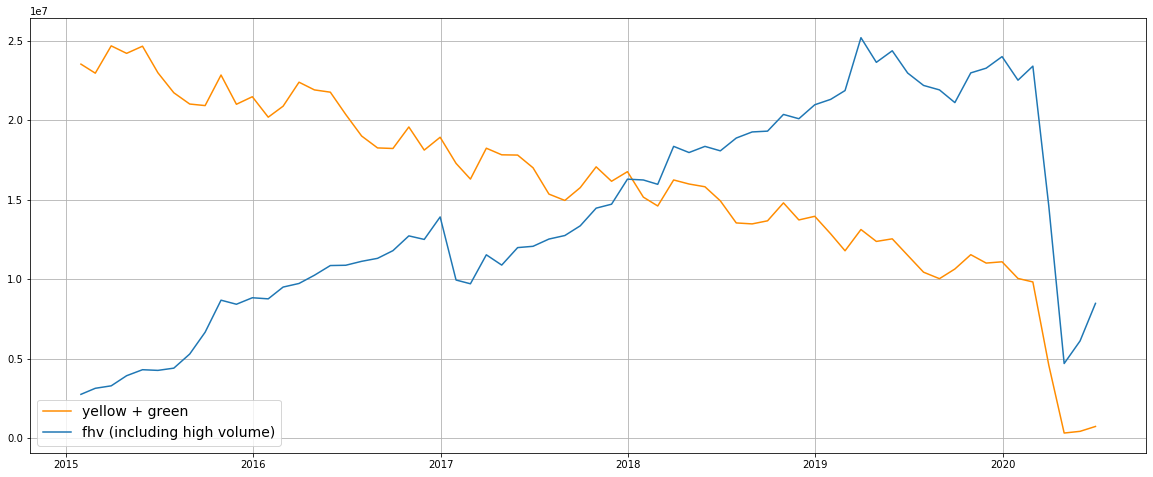

In [71]:
################################################
# 'individual': yellow / green / fhv / hvfhv
# 'twoGroup':   yellow + green / fhv + hvfhv
# 'total':      yellow + green + fhv + hvfhv
################################################
plot_type = 'twoGroup'    

plt.figure(figsize=(20,8))
if plot_type == 'individual': 
    plt.plot(yellow_monthly['passenger_count'], label="yellow")
    plt.plot(green_monthly['passenger_count'], label="green")
    plt.plot(fhv_monthly['passenger_count'], label="fhv")
    plt.plot(hvfhv_monthly['passenger_count'], label="hvfhv")
elif plot_type == 'twoGroup':
    plt.plot(trad_taxi_monthly['passenger_count'], label="yellow + green", c="darkorange")
    plt.plot(app_taxi_monthly['passenger_count'], label="fhv (including high volume)")
elif plot_type == 'total':
    plt.plot(total_taxi_monthly['passenger_count'], label="total")

plt.legend(fontsize=14)
plt.grid()
plt.show()

### Plotting ACF, PACF

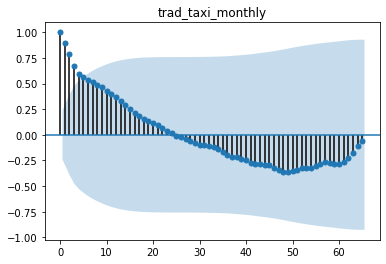

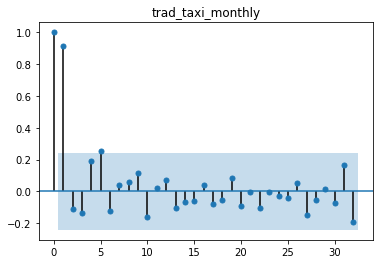

In [72]:
trad = trad_taxi_monthly['passenger_count']
lag = len(trad) -1
title = 'trad_taxi_monthly'
plot_acf(x=trad, lags=lag, title=title)
plt.show()
plot_pacf(x=trad, lags=lag//2, title=title)
plt.show()

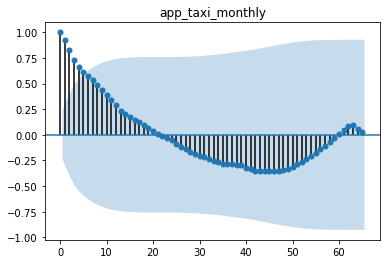

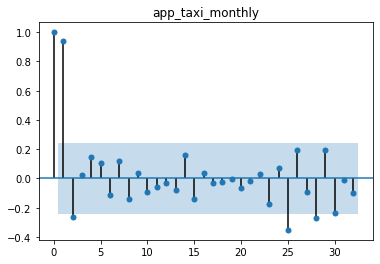

In [73]:
app = app_taxi_monthly['passenger_count']
lag = len(app) -1
title = 'app_taxi_monthly'
plot_acf(x=app, lags=lag, title=title)
plt.show()
plot_pacf(x=app, lags=lag//2, title=title)
plt.show()

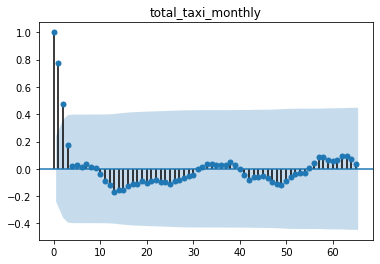

C:\Users\sujeong\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


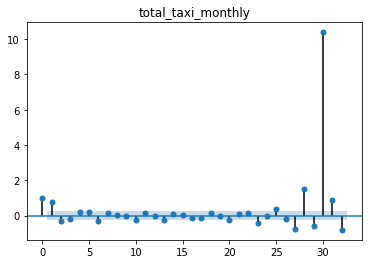

In [74]:
total = total_taxi_monthly['passenger_count']
lag = len(total) -1
title = 'total_taxi_monthly'
plot_acf(x=total, lags=lag, title=title)
plt.show()
plot_pacf(x=total, lags=lag//2, title=title)
plt.show()

### Fitting ARIMA

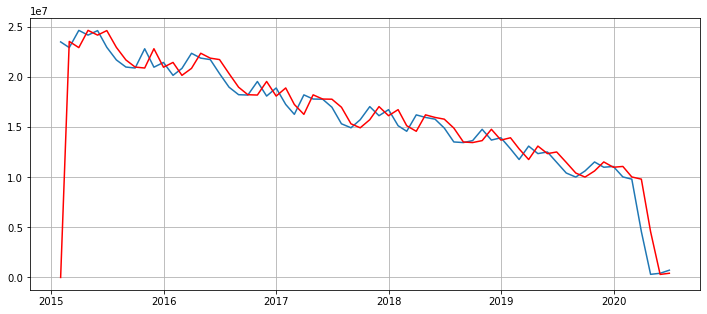

In [78]:
model_trad = ARIMA(trad, order=(1,1,0))
results_trad = model_trad.fit()
plt.figure(figsize=(12,5))
plt.plot(trad)
plt.plot(results_trad.fittedvalues, color='red')
plt.grid()
plt.show()

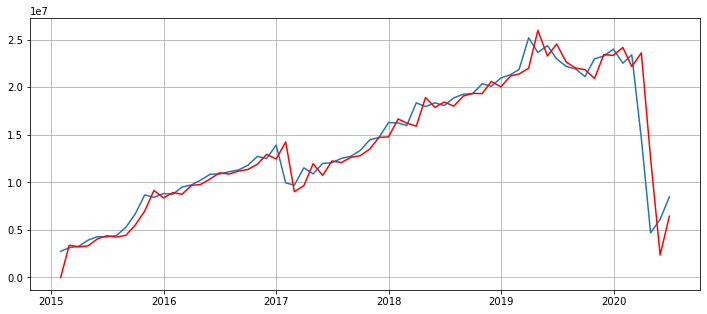

In [76]:
model_app = ARIMA(app, order=(1,1,0))
results_app = model_app.fit()
plt.figure(figsize=(12,5))
plt.plot(app)
plt.plot(results_app.fittedvalues, color='red')
plt.grid()
plt.show()

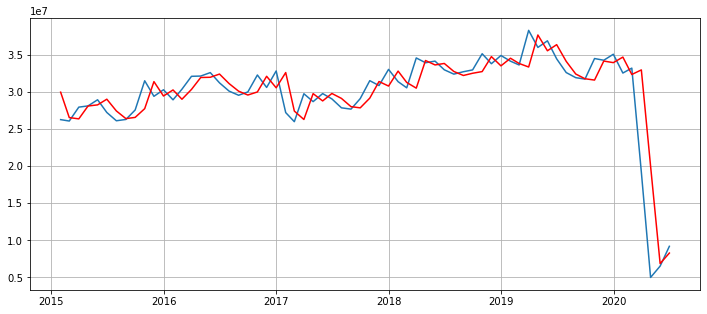

In [77]:
model_total = ARIMA(total, order=(1,0,0))
results_total = model_total.fit()
plt.figure(figsize=(12,5))
plt.plot(total)
plt.plot(results_total.fittedvalues, color='red')
plt.grid()
plt.show()